In [26]:
import pandas as pd
import numpy as np
import spacy

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from urllib.request import urlopen
from nltk.tokenize import sent_tokenize, word_tokenize

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

In [3]:
a=chess.groupby('Federation').count().sort_values(by=['ID'],ascending=False)
a=a.drop(['url','Form.Fed','Transfer Date'],axis=1).reset_index()
a

,Federation,ID
0,USA,89
1,GER,55
2,CAN,44
3,ESP,41
4,RUS,36
...,...,...
100,DOM,1
101,MYA,1
102,QAT,1
103,PUR,1


In [4]:
b=a.head(10)
b

,Federation,ID
0,USA,89
1,GER,55
2,CAN,44
3,ESP,41
4,RUS,36
5,FRA,34
6,CRO,32
7,BIH,32
8,TUR,31
9,AUT,29


<BarContainer object of 10 artists>

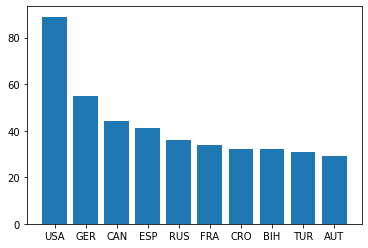

In [5]:
labels = b['Federation']
values = b['ID']
plt.bar(labels,values)

In [6]:
pair=chess.groupby(['Form.Fed','Federation']).count().reset_index().sort_values(by=['ID'],ascending=False)
pair

,Form.Fed,Federation,url,ID,Transfer Date
357,SRB,BIH,18,18,18
160,FRA,MNC,17,17,17
330,RUS,GER,16,16,16
403,UKR,RUS,14,14,14
397,UKR,GER,12,12,12
...,...,...,...,...,...
187,GER,POL,1,1,1
183,GER,EGY,1,1,1
181,GER,AZE,1,1,1
178,GER,AND,1,1,1


In [7]:
dic={}
for i in range(len(pair)):
    
    dic[(pair.iloc[i]['Form.Fed'],pair.iloc[i]['Federation'])]=pair.iloc[i]['ID']

dic

{('SRB', 'BIH'): 18,
 ('FRA', 'MNC'): 17,
 ('RUS', 'GER'): 16,
 ('UKR', 'RUS'): 14,
 ('UKR', 'GER'): 12,
 ('IND', 'USA'): 11,
 ('RUS', 'UKR'): 10,
 ('SCG', 'CRO'): 10,
 ('GER', 'SUI'): 9,
 ('ARM', 'USA'): 8,
 ('AZE', 'TUR'): 8,
 ('CRO', 'BIH'): 8,
 ('RUS', 'CZE'): 8,
 ('SVK', 'CZE'): 8,
 ('BIH', 'CRO'): 8,
 ('ROU', 'FRA'): 8,
 ('RUS', 'USA'): 7,
 ('CUB', 'USA'): 7,
 ('CUB', 'ESP'): 7,
 ('UKR', 'USA'): 7,
 ('ENG', 'WLS'): 7,
 ('ESP', 'AND'): 7,
 ('ISR', 'CAN'): 7,
 ('SRB', 'CRO'): 6,
 ('PHI', 'USA'): 6,
 ('SYR', 'FIN'): 6,
 ('USA', 'CAN'): 5,
 ('HUN', 'AUT'): 5,
 ('ARG', 'ESP'): 5,
 ('CHN', 'SIN'): 5,
 ('GER', 'LIE'): 5,
 ('RUS', 'ISR'): 5,
 ('UKR', 'FRA'): 4,
 ('POR', 'ECU'): 4,
 ('CAN', 'YUG'): 4,
 ('RUS', 'ARM'): 4,
 ('USA', 'JPN'): 4,
 ('NZL', 'AUS'): 4,
 ('ENG', 'SCO'): 4,
 ('SRB', 'MNE'): 4,
 ('BIH', 'GER'): 4,
 ('AND', 'ESP'): 4,
 ('GER', 'TUR'): 4,
 ('YUG', 'CAN'): 4,
 ('ESP', 'IRL'): 4,
 ('NED', 'AHO'): 4,
 ('GER', 'AUT'): 4,
 ('UZB', 'RUS'): 4,
 ('GEO', 'USA'): 4,
 ('UKR', 'BE

In [8]:
res = {key : val for key, val in dic.items() if val >= 5}
res

{('SRB', 'BIH'): 18,
 ('FRA', 'MNC'): 17,
 ('RUS', 'GER'): 16,
 ('UKR', 'RUS'): 14,
 ('UKR', 'GER'): 12,
 ('IND', 'USA'): 11,
 ('RUS', 'UKR'): 10,
 ('SCG', 'CRO'): 10,
 ('GER', 'SUI'): 9,
 ('ARM', 'USA'): 8,
 ('AZE', 'TUR'): 8,
 ('CRO', 'BIH'): 8,
 ('RUS', 'CZE'): 8,
 ('SVK', 'CZE'): 8,
 ('BIH', 'CRO'): 8,
 ('ROU', 'FRA'): 8,
 ('RUS', 'USA'): 7,
 ('CUB', 'USA'): 7,
 ('CUB', 'ESP'): 7,
 ('UKR', 'USA'): 7,
 ('ENG', 'WLS'): 7,
 ('ESP', 'AND'): 7,
 ('ISR', 'CAN'): 7,
 ('SRB', 'CRO'): 6,
 ('PHI', 'USA'): 6,
 ('SYR', 'FIN'): 6,
 ('USA', 'CAN'): 5,
 ('HUN', 'AUT'): 5,
 ('ARG', 'ESP'): 5,
 ('CHN', 'SIN'): 5,
 ('GER', 'LIE'): 5,
 ('RUS', 'ISR'): 5}

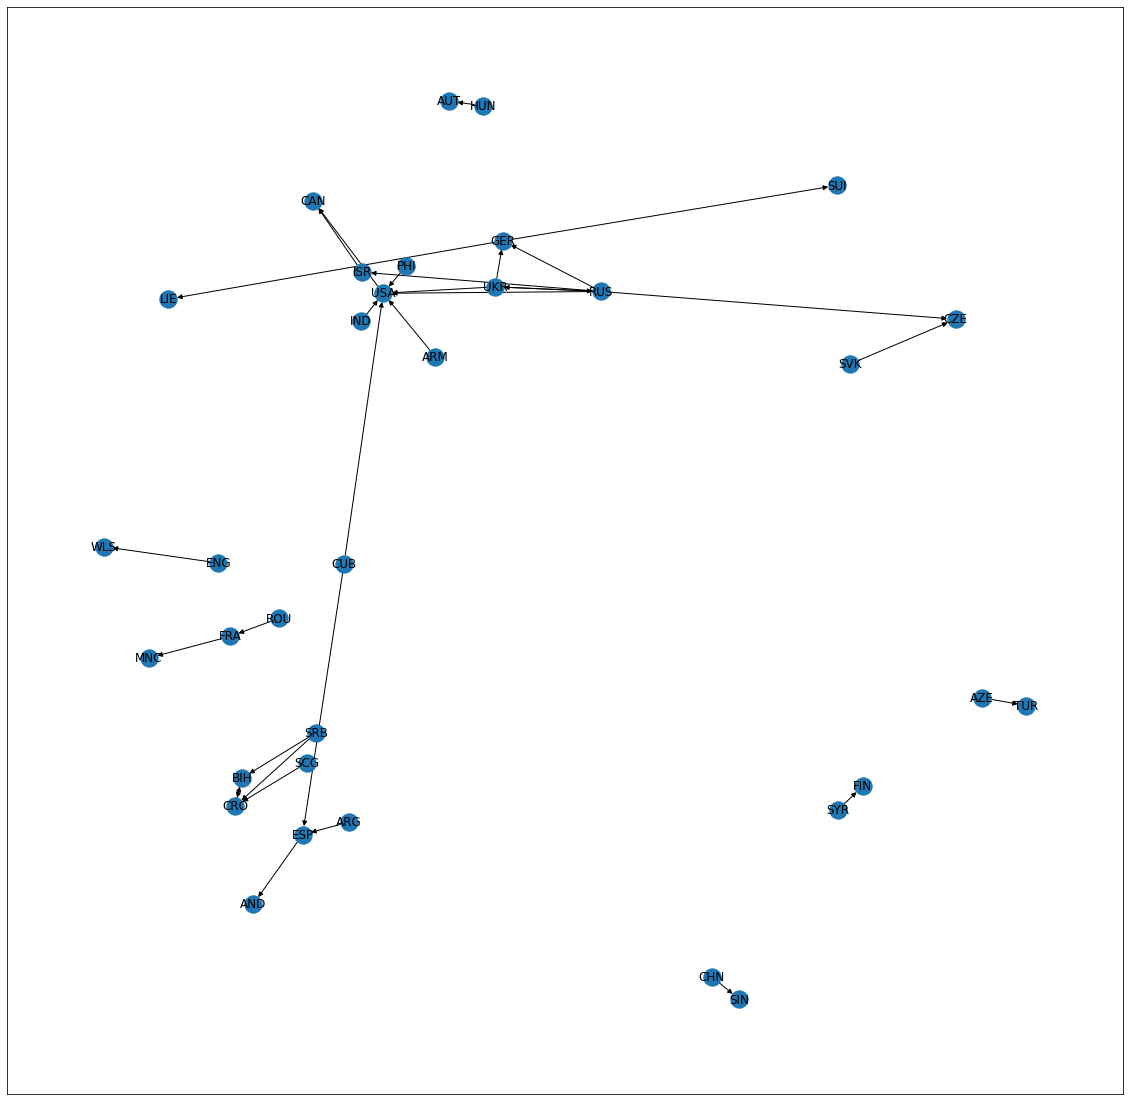

In [9]:
G = nx.DiGraph()
G.add_edges_from(res.keys())
  
plt.figure(figsize =(20,20))
nx.draw_networkx(G)

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [10]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

In [11]:
NBA = NBA[NBA['PLAYER2_NAME'].notna()].reset_index()
NBA

,index,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
1,2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
2,4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
3,7,7,1,6,15,21800794,NaN,NaN,11:13,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden P.FOUL (P1.T1) (T.Maddox),9:13 PM
4,8,8,1,5,17,21800794,Okobo Bad Pass Turnover (P1.T2),NaN,11:05,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ennis III STEAL (1 STL),9:13 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189926,582457,425,0,8,624,21801037,NaN,NaN,0:05,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Nwaba FOR Zizic,10:47 PM
189927,582458,426,28,6,626,21801037,NaN,NaN,0:04,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Osman Personal Take Foul (P2.PN) (D.Taylor),10:48 PM
189928,582460,428,0,8,629,21801037,NaN,NaN,0:04,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Zizic FOR Nwaba,10:49 PM
189929,582461,429,0,8,631,21801037,SUB: Finney-Smith FOR Nowitzki,NaN,0:04,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:49 PM


In [12]:
dic1={}
for i in range(len(NBA)):
    if NBA.iloc[i]['PLAYER3_NAME']==NBA.iloc[i]['PLAYER3_NAME']:
        
        if (NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME']) in dic1.keys():
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME'])] +=1 
        else:
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME'])]=1
        if (NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER3_NAME']) in dic1.keys():
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER3_NAME'])] +=1 
        else:
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER3_NAME'])]=1
        if (NBA.iloc[i]['PLAYER2_NAME'],NBA.iloc[i]['PLAYER3_NAME']) in dic1.keys():
            dic1[(NBA.iloc[i]['PLAYER2_NAME'],NBA.iloc[i]['PLAYER3_NAME'])] +=1 
        else:
            dic1[(NBA.iloc[i]['PLAYER2_NAME'],NBA.iloc[i]['PLAYER3_NAME'])]=1
    else:
        if (NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME']) in dic1.keys():
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME'])] +=1 
        else:
            dic1[(NBA.iloc[i]['PLAYER1_NAME'],NBA.iloc[i]['PLAYER2_NAME'])]=1

In [14]:
dic1

{('Deandre Ayton', 'Kenneth Faried'): 1,
 ('Deandre Ayton', 'Elie Okobo'): 22,
 ('Kenneth Faried', 'Elie Okobo'): 1,
 ('Josh Jackson', 'James Harden'): 5,
 ('Mikal Bridges', 'James Harden'): 8,
 ('James Harden', 'Devin Booker'): 1,
 ('Elie Okobo', 'James Ennis III'): 1,
 ('James Harden', 'Deandre Ayton'): 4,
 ('Kenneth Faried', 'Chris Paul'): 31,
 ('Elie Okobo', 'Chris Paul'): 3,
 ('Chris Paul', 'Elie Okobo'): 1,
 ('Kenneth Faried', 'Josh Jackson'): 2,
 ('Chris Paul', 'Josh Jackson'): 1,
 ('Josh Jackson', 'James Ennis III'): 1,
 ('James Harden', 'Chris Paul'): 98,
 ('Elie Okobo', 'Kelly Oubre Jr.'): 6,
 ('Kenneth Faried', 'Austin Rivers'): 14,
 ('Chris Paul', 'Nene'): 5,
 ('PJ Tucker', 'Austin Rivers'): 31,
 ('Nene', 'Devin Booker'): 1,
 ('James Ennis III', 'Gerald Green'): 22,
 ('Kelly Oubre Jr.', 'Josh Jackson'): 27,
 ('James Harden', 'Mikal Bridges'): 3,
 ('Devin Booker', 'Mikal Bridges'): 42,
 ('Nene', 'Deandre Ayton'): 1,
 ('Gerald Green', 'James Harden'): 72,
 ('Kelly Oubre Jr.',

In [15]:
res1 = {key:val for key,val in dic1.items() if val > 74}
res1

{('James Harden', 'Chris Paul'): 98,
 ('Richaun Holmes', 'Deandre Ayton'): 88,
 ('Deandre Ayton', 'Devin Booker'): 102,
 ('Deandre Ayton', 'Richaun Holmes'): 132,
 ('Donovan Mitchell', 'Joe Ingles'): 117,
 ('Derrick Favors', 'Jae Crowder'): 107,
 ('Rudy Gobert', 'Derrick Favors'): 155,
 ('Joe Ingles', "Royce O'Neale"): 99,
 ('Derrick Favors', 'Rudy Gobert'): 97,
 ("Royce O'Neale", 'Joe Ingles'): 100,
 ('Rudy Gobert', 'Donovan Mitchell'): 77,
 ('DeAndre Jordan', 'Luka Doncic'): 88,
 ('Derrick Favors', 'Joe Ingles'): 116,
 ('Jakob Poeltl', 'LaMarcus Aldridge'): 75,
 ('Bryn Forbes', 'DeMar DeRozan'): 98,
 ('Bryn Forbes', 'Patty Mills'): 136,
 ('LaMarcus Aldridge', 'DeMar DeRozan'): 128,
 ('LaMarcus Aldridge', 'Jakob Poeltl'): 117,
 ('Derrick Favors', 'Ricky Rubio'): 79,
 ('Marco Belinelli', 'DeMar DeRozan'): 83,
 ('Rudy Gobert', 'Ricky Rubio'): 108,
 ('Kevin Durant', 'Draymond Green'): 103,
 ('Klay Thompson', 'Kevin Durant'): 151,
 ('Josh Richardson', 'Dwyane Wade'): 128,
 ('Justise Winsl

In [16]:
liste=[]
for i in list(res1.keys()):
    for j in [0,1]:
        if i[j] not in liste:
            liste.append(i[j])
liste

['James Harden',
 'Chris Paul',
 'Richaun Holmes',
 'Deandre Ayton',
 'Devin Booker',
 'Donovan Mitchell',
 'Joe Ingles',
 'Derrick Favors',
 'Jae Crowder',
 'Rudy Gobert',
 "Royce O'Neale",
 'DeAndre Jordan',
 'Luka Doncic',
 'Jakob Poeltl',
 'LaMarcus Aldridge',
 'Bryn Forbes',
 'DeMar DeRozan',
 'Patty Mills',
 'Ricky Rubio',
 'Marco Belinelli',
 'Kevin Durant',
 'Draymond Green',
 'Klay Thompson',
 'Josh Richardson',
 'Dwyane Wade',
 'Justise Winslow',
 'Stephen Curry',
 'Andre Iguodala',
 'Reggie Jackson',
 'Blake Griffin',
 'Julius Randle',
 'Jrue Holiday',
 "E'Twaun Moore",
 'Reggie Bullock',
 'Kevin Huerter',
 'Trae Young',
 'Dewayne Dedmon',
 'Alex Len',
 'John Collins',
 'Vince Carter',
 'Hassan Whiteside',
 'Bam Adebayo',
 'Jeremy Lamb',
 'Kemba Walker',
 'Marvin Williams',
 'Michael Kidd-Gilchrist',
 'Myles Turner',
 'Darren Collison',
 'Domantas Sabonis',
 'Bojan Bogdanovic',
 'Thaddeus Young',
 'Pascal Siakam',
 'Kyle Lowry',
 'Danny Green',
 'Serge Ibaka',
 'Thomas Bryan

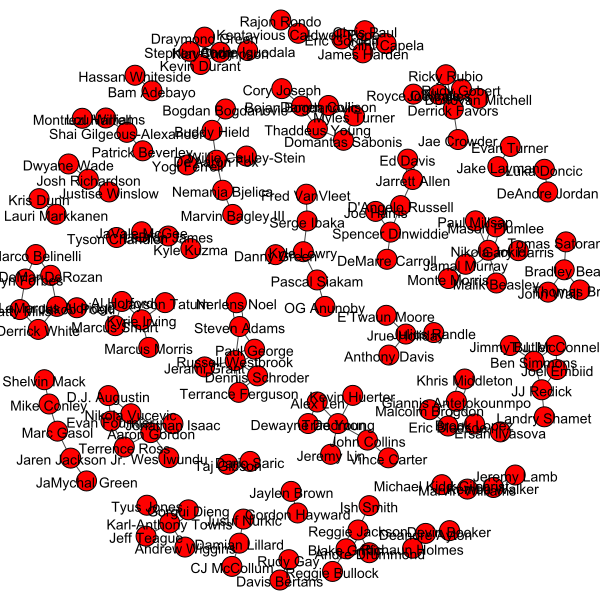

In [17]:
G = ig.Graph()
G.add_vertices(liste)
G.add_edges(res1.keys())
G.vs['label'] = liste
ig.plot(G)

In [18]:
G.maximal_cliques()

[(152, 151),
 (34, 35),
 (38, 39),
 (38, 35),
 (40, 41),
 (42, 43),
 (43, 44),
 (44, 45),
 (51, 57),
 (51, 52),
 (52, 54),
 (52, 53),
 (54, 137),
 (55, 56),
 (56, 120),
 (56, 102),
 (70, 67),
 (71, 60),
 (80, 77),
 (81, 73),
 (87, 84),
 (88, 31),
 (89, 90),
 (90, 140),
 (90, 94),
 (90, 91),
 (91, 92),
 (93, 49),
 (94, 141),
 (95, 67),
 (97, 98),
 (98, 101),
 (99, 100),
 (104, 28),
 (105, 106),
 (109, 72),
 (112, 110),
 (114, 115),
 (118, 150),
 (118, 119),
 (121, 124),
 (121, 122),
 (123, 124),
 (125, 35),
 (131, 132),
 (132, 133),
 (133, 134),
 (135, 136),
 (138, 139),
 (142, 126),
 (143, 116),
 (145, 146),
 (147, 110),
 (148, 116),
 (149, 116),
 (150, 151),
 (4, 3),
 (8, 7),
 (11, 12),
 (23, 25),
 (23, 24),
 (27, 22),
 (30, 31),
 (31, 32),
 (33, 29),
 (130, 127, 129),
 (2, 3),
 (0, 1, 63),
 (0, 1, 113),
 (5, 6, 9),
 (64, 58),
 (65, 67),
 (65, 66),
 (67, 68, 69),
 (72, 73, 108),
 (10, 6),
 (73, 79, 108),
 (74, 96),
 (74, 75, 78),
 (13, 14),
 (14, 107),
 (14, 16),
 (15, 17),
 (15, 16, 

In [19]:
list(zip(G.vs['label'],G.degree()))

[('James Harden', 3),
 ('Chris Paul', 3),
 ('Richaun Holmes', 2),
 ('Deandre Ayton', 3),
 ('Devin Booker', 1),
 ('Donovan Mitchell', 2),
 ('Joe Ingles', 6),
 ('Derrick Favors', 5),
 ('Jae Crowder', 1),
 ('Rudy Gobert', 5),
 ("Royce O'Neale", 2),
 ('DeAndre Jordan', 1),
 ('Luka Doncic', 1),
 ('Jakob Poeltl', 2),
 ('LaMarcus Aldridge', 4),
 ('Bryn Forbes', 3),
 ('DeMar DeRozan', 3),
 ('Patty Mills', 2),
 ('Ricky Rubio', 3),
 ('Marco Belinelli', 2),
 ('Kevin Durant', 4),
 ('Draymond Green', 3),
 ('Klay Thompson', 4),
 ('Josh Richardson', 2),
 ('Dwyane Wade', 1),
 ('Justise Winslow', 1),
 ('Stephen Curry', 4),
 ('Andre Iguodala', 1),
 ('Reggie Jackson', 4),
 ('Blake Griffin', 4),
 ('Julius Randle', 1),
 ('Jrue Holiday', 3),
 ("E'Twaun Moore", 1),
 ('Reggie Bullock', 1),
 ('Kevin Huerter', 1),
 ('Trae Young', 5),
 ('Dewayne Dedmon', 2),
 ('Alex Len', 2),
 ('John Collins', 2),
 ('Vince Carter', 1),
 ('Hassan Whiteside', 1),
 ('Bam Adebayo', 1),
 ('Jeremy Lamb', 1),
 ('Kemba Walker', 2),
 ('M

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [20]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [22]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

In [23]:
names=list(names)
names=sorted(names)
names

['Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle']

In [27]:
sentences = sent_tokenize(greatExpectations)
sentences

['\r\n\r\nMy father’s family name being Pirrip, and my Christian name Philip, my\r\ninfant tongue could make of both names nothing longer or more explicit\r\nthan Pip.',
 'So, I called myself Pip, and came to be called Pip.',
 'I give Pirrip as my father’s family name, on the authority of his\r\ntombstone and my sister,—Mrs.',
 'Joe Gargery, who married the blacksmith.',
 'As I never saw my father or my mother, and never saw any likeness of\r\neither of them (for their days were long before the days of\r\nphotographs), my first fancies regarding what they were like were\r\nunreasonably derived from their tombstones.',
 'The shape of the letters on\r\nmy father’s, gave me an odd idea that he was a square, stout, dark man,\r\nwith curly black hair.',
 'From the character and turn of the inscription,\r\n“_Also Georgiana Wife of the Above_,” I drew a childish conclusion that\r\nmy mother was freckled and sickly.',
 'To five little stone lozenges, each\r\nabout a foot and a half long, which

In [28]:
d=[]
dic2={}
for v in sentences:
    words=word_tokenize(v)
    
    for i in words:
        if i in names:
            d.append(i)
    
    if len(set(d))>1: 
        d=sorted(d)
        for j in range(len(d)):
            for k in range(j,len(d)):
                if (d[j],d[k]) in dic2.keys() and j!=k:
                    
                    dic2[(d[j],d[k])]+=1
                elif (d[j],d[k]) not in dic2.keys() and j!=k:
                    
                    dic2[(d[j],d[k])]=1
    d.clear()

In [29]:
dic2

{('Joe', 'Pip'): 140,
 ('Joe', 'Joe'): 62,
 ('Hubble', 'Hubble'): 2,
 ('Hubble', 'Joe'): 8,
 ('Hubble', 'Pumblechook'): 8,
 ('Hubble', 'Wopsle'): 5,
 ('Joe', 'Pumblechook'): 32,
 ('Joe', 'Wopsle'): 17,
 ('Pumblechook', 'Wopsle'): 7,
 ('Richard', 'Wopsle'): 3,
 ('Biddy', 'Wopsle'): 6,
 ('Wopsle', 'Wopsle'): 2,
 ('Pip', 'Pip'): 18,
 ('Pumblechook', 'Pumblechook'): 5,
 ('Havisham', 'Joe'): 53,
 ('Joseph', 'Pumblechook'): 11,
 ('Joe', 'Joseph'): 5,
 ('Joseph', 'Joseph'): 1,
 ('Havisham', 'Havisham'): 12,
 ('Havisham', 'Pumblechook'): 11,
 ('Pip', 'Pumblechook'): 7,
 ('Estella', 'Havisham'): 74,
 ('Estella', 'Joe'): 13,
 ('Havisham', 'Pip'): 37,
 ('Pip', 'Wopsle'): 1,
 ('Pocket', 'Pocket'): 10,
 ('Pocket', 'Sarah'): 22,
 ('Estella', 'Pocket'): 2,
 ('Estella', 'Sarah'): 2,
 ('Havisham', 'Pocket'): 8,
 ('Havisham', 'Sarah'): 6,
 ('Sarah', 'Sarah'): 1,
 ('Estella', 'Estella'): 8,
 ('Joe', 'Orlick'): 6,
 ('Orlick', 'Pip'): 2,
 ('Orlick', 'Orlick'): 6,
 ('Orlick', 'Wopsle'): 3,
 ('Biddy', 'Joe')

In [30]:
res2 = {key:val for key,val in dic2.items() if val > 2}
res2

{('Joe', 'Pip'): 140,
 ('Joe', 'Joe'): 62,
 ('Hubble', 'Joe'): 8,
 ('Hubble', 'Pumblechook'): 8,
 ('Hubble', 'Wopsle'): 5,
 ('Joe', 'Pumblechook'): 32,
 ('Joe', 'Wopsle'): 17,
 ('Pumblechook', 'Wopsle'): 7,
 ('Richard', 'Wopsle'): 3,
 ('Biddy', 'Wopsle'): 6,
 ('Pip', 'Pip'): 18,
 ('Pumblechook', 'Pumblechook'): 5,
 ('Havisham', 'Joe'): 53,
 ('Joseph', 'Pumblechook'): 11,
 ('Joe', 'Joseph'): 5,
 ('Havisham', 'Havisham'): 12,
 ('Havisham', 'Pumblechook'): 11,
 ('Pip', 'Pumblechook'): 7,
 ('Estella', 'Havisham'): 74,
 ('Estella', 'Joe'): 13,
 ('Havisham', 'Pip'): 37,
 ('Pocket', 'Pocket'): 10,
 ('Pocket', 'Sarah'): 22,
 ('Havisham', 'Pocket'): 8,
 ('Havisham', 'Sarah'): 6,
 ('Estella', 'Estella'): 8,
 ('Joe', 'Orlick'): 6,
 ('Orlick', 'Orlick'): 6,
 ('Orlick', 'Wopsle'): 3,
 ('Biddy', 'Joe'): 74,
 ('Biddy', 'Pip'): 30,
 ('Biddy', 'Biddy'): 18,
 ('Biddy', 'Estella'): 4,
 ('Biddy', 'Orlick'): 5,
 ('Biddy', 'Havisham'): 3,
 ('Herbert', 'Herbert'): 25,
 ('Herbert', 'Pocket'): 14,
 ('Havisham'

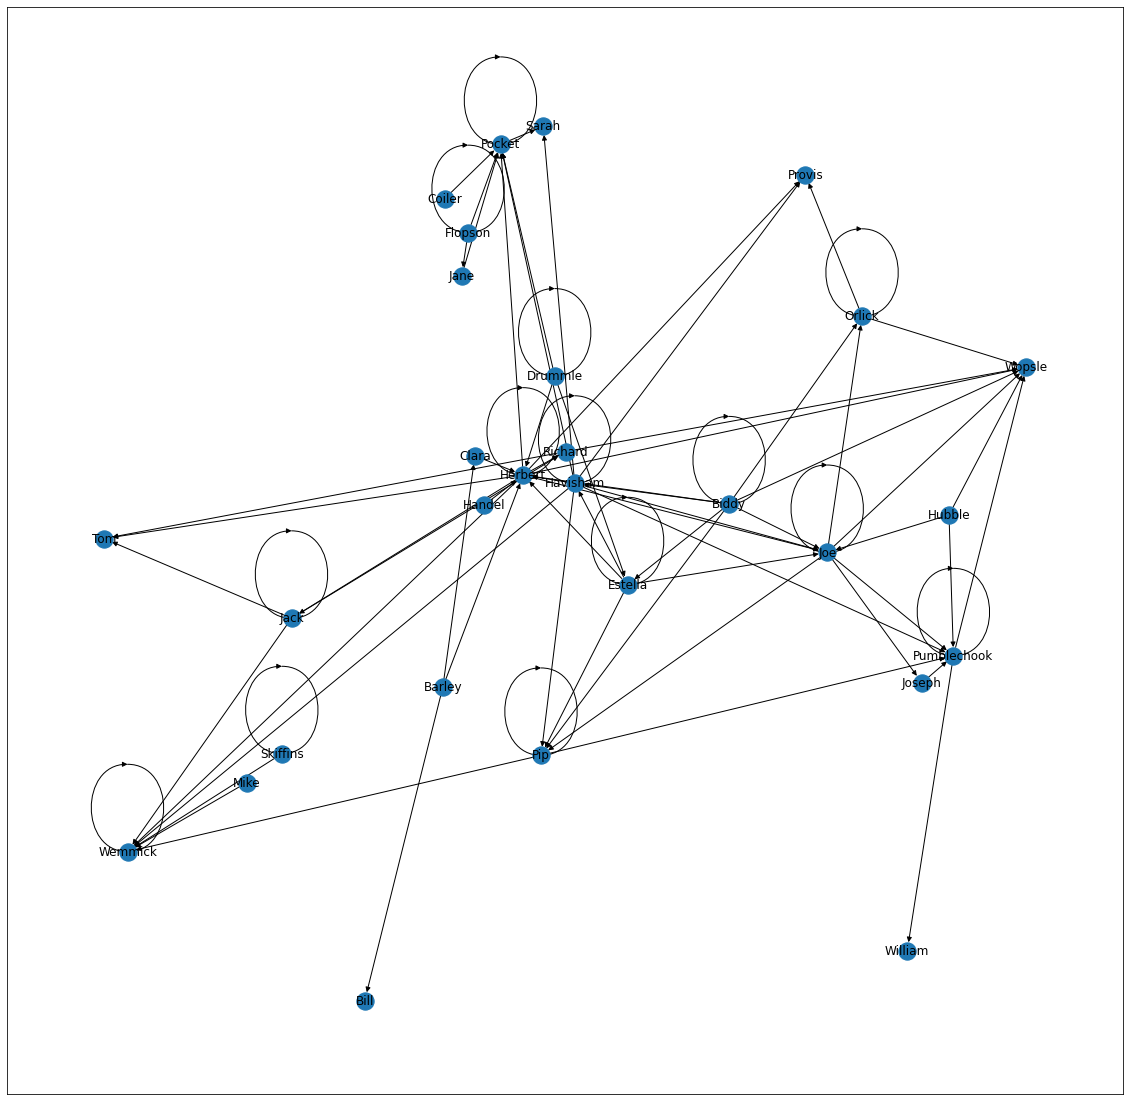

In [31]:
G = nx.DiGraph()
G.add_edges_from(res2.keys())
  
plt.figure(figsize =(20,20))
nx.draw_networkx(G)